# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    * 딥러닝
        * 모델 구조를 2가지 이상을 생성하고 모델링을 수행합니다.
        * epochs, learning_rate 등을 조절하며 성능을 튜닝합니다.
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.
        * 성능 가이드
            * MAE : 4 ~ 6
            * MAPE : 0.09~0.14

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고,
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [346]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [347]:
path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [332]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 5.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.6
    Uninstalling xgboost-1.7.6:
      Successfully uninstalled xgboost-1.7.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.12.3 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.


#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl

In [406]:
file1 = '/content/drive/MyDrive/project/data2.pkl'
file2 = '/content/drive/MyDrive/project/data_holi.pkl'
file3 = '/content/drive/MyDrive/project/data_work.pkl'

In [407]:
with open(file1, 'rb') as f:
        df=joblib.load(f)

In [408]:
with open(file2, 'rb') as f:
        dfh=joblib.load(f)

In [409]:
with open(file3, 'rb') as f:
        dfw=joblib.load(f)

## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [410]:
# 날짜 데이터 삭제
df.set_index(keys='Date',inplace=True)
#df.drop('Date',axis=1,inplace=True)
df.head()

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,year,day,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,holiday,waiting_time7,ride_per,isRain
Date,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,213,1023,924,17.2,2427,10764,3,1,1,2015,1,-2.0,-8.9,0.0,63.0,28.0,9.07,winter,1,17.200000,0.903,False
2015-01-02,420,3158,2839,17.2,2216,8611,4,1,1,2015,2,2.4,-9.2,0.0,73.0,37.0,8.66,winter,0,17.200000,0.899,False
2015-01-03,209,1648,1514,26.2,2377,10198,5,1,1,2015,3,8.2,0.2,0.0,89.0,58.0,5.32,winter,0,21.700000,0.919,False
2015-01-04,196,1646,1526,24.5,2431,10955,6,1,1,2015,4,7.9,-0.9,0.0,95.0,52.0,6.48,winter,0,22.633333,0.927,False
2015-01-05,421,4250,3730,26.2,2214,8663,0,1,2,2015,5,4.1,-7.4,3.4,98.0,29.0,10.47,winter,0,23.525000,0.878,True


In [411]:
df.isna().sum()

car_cnt            0
request_cnt        0
ride_cnt           0
waiting_time       0
fare               0
distance           0
weekday            0
month              0
week               0
year               0
day                0
temp_max           0
temp_min           0
rain(mm)           0
humidity_max(%)    0
humidity_min(%)    0
sunshine(MJ/m2)    0
season             0
holiday            0
waiting_time7      0
ride_per           0
isRain             0
dtype: int64

In [267]:
# df = df.loc[df['waiting_time'].notnull()]
# df = df.loc[df['waiting_time7'].notnull()]
# df = df.loc[df['temp_max'].notnull()]
# df = df.loc[df['temp_min'].notnull()]
# df = df.loc[df['rain(mm)'].notnull()]
# df = df.loc[df['humidity_max(%)'].notnull()]
# df = df.loc[df['humidity_min(%)'].notnull()]
# df = df.loc[df['sunshine(MJ/m2)'].notnull()]

In [356]:
df.head(5)

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,year,day,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,holiday,waiting_time7,ride_per,isRain
Date,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,213,1023,924,17.2,2427,10764,3,1,1,2015,1,-2.0,-8.9,0.0,63.0,28.0,9.07,winter,1,17.200000,0.903,False
2015-01-02,420,3158,2839,17.2,2216,8611,4,1,1,2015,2,2.4,-9.2,0.0,73.0,37.0,8.66,winter,0,17.200000,0.899,False
2015-01-03,209,1648,1514,26.2,2377,10198,5,1,1,2015,3,8.2,0.2,0.0,89.0,58.0,5.32,winter,0,21.700000,0.919,False
2015-01-04,196,1646,1526,24.5,2431,10955,6,1,1,2015,4,7.9,-0.9,0.0,95.0,52.0,6.48,winter,0,22.633333,0.927,False
2015-01-05,421,4250,3730,26.2,2214,8663,0,1,2,2015,5,4.1,-7.4,3.4,98.0,29.0,10.47,winter,0,23.525000,0.878,True


In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 2015-01-01 to 2022-12-31
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car_cnt          2922 non-null   int64  
 1   request_cnt      2922 non-null   int64  
 2   ride_cnt         2922 non-null   int64  
 3   waiting_time     2922 non-null   float64
 4   fare             2922 non-null   int64  
 5   distance         2922 non-null   int64  
 6   weekday          2922 non-null   int64  
 7   month            2922 non-null   int64  
 8   week             2922 non-null   int64  
 9   year             2922 non-null   int64  
 10  day              2922 non-null   int64  
 11  temp_max         2922 non-null   float64
 12  temp_min         2922 non-null   float64
 13  rain(mm)         2922 non-null   float64
 14  humidity_max(%)  2922 non-null   float64
 15  humidity_min(%)  2922 non-null   float64
 16  sunshine(MJ/m2)  2922 non-null   float64
 

### (2) 가변수화

In [412]:
pd.options.display.max_columns = None

In [413]:
dummy_cols=['season','weekday','isRain']

df=pd.get_dummies(df,columns=dummy_cols,drop_first=True)
df.head()

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,month,week,year,day,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),holiday,waiting_time7,ride_per,season_spring,season_summer,season_winter,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,isRain_True
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,213,1023,924,17.2,2427,10764,1,1,2015,1,-2.0,-8.9,0.0,63.0,28.0,9.07,1,17.200000,0.903,0,0,1,0,0,1,0,0,0,0
2015-01-02,420,3158,2839,17.2,2216,8611,1,1,2015,2,2.4,-9.2,0.0,73.0,37.0,8.66,0,17.200000,0.899,0,0,1,0,0,0,1,0,0,0
2015-01-03,209,1648,1514,26.2,2377,10198,1,1,2015,3,8.2,0.2,0.0,89.0,58.0,5.32,0,21.700000,0.919,0,0,1,0,0,0,0,1,0,0
2015-01-04,196,1646,1526,24.5,2431,10955,1,1,2015,4,7.9,-0.9,0.0,95.0,52.0,6.48,0,22.633333,0.927,0,0,1,0,0,0,0,0,1,0
2015-01-05,421,4250,3730,26.2,2214,8663,1,2,2015,5,4.1,-7.4,3.4,98.0,29.0,10.47,0,23.525000,0.878,0,0,1,0,0,0,0,0,0,1


### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

#### 1) x, y 나누기

In [414]:
target='waiting_time'
x=df.drop(target,axis=1)
y=df.loc[:,target]

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False)

In [415]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=91,  shuffle = False)

In [416]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2831, 28)
(91, 28)
(2831,)
(91,)


In [417]:
df.head()

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,month,week,year,day,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),holiday,waiting_time7,ride_per,season_spring,season_summer,season_winter,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,isRain_True
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,213,1023,924,17.2,2427,10764,1,1,2015,1,-2.0,-8.9,0.0,63.0,28.0,9.07,1,17.200000,0.903,0,0,1,0,0,1,0,0,0,0
2015-01-02,420,3158,2839,17.2,2216,8611,1,1,2015,2,2.4,-9.2,0.0,73.0,37.0,8.66,0,17.200000,0.899,0,0,1,0,0,0,1,0,0,0
2015-01-03,209,1648,1514,26.2,2377,10198,1,1,2015,3,8.2,0.2,0.0,89.0,58.0,5.32,0,21.700000,0.919,0,0,1,0,0,0,0,1,0,0
2015-01-04,196,1646,1526,24.5,2431,10955,1,1,2015,4,7.9,-0.9,0.0,95.0,52.0,6.48,0,22.633333,0.927,0,0,1,0,0,0,0,0,1,0
2015-01-05,421,4250,3730,26.2,2214,8663,1,2,2015,5,4.1,-7.4,3.4,98.0,29.0,10.47,0,23.525000,0.878,0,0,1,0,0,0,0,0,0,1


### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.

In [418]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 딥러닝 모델 구조 2가지 이상을 설계하고 모델을 생성합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [419]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

### (1) 머신러닝

#### 1) 모델1

In [366]:
model1 = LinearRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

MAE: 4.286536338377334
MAPE: 0.1095591916782691
0.21547342635971234


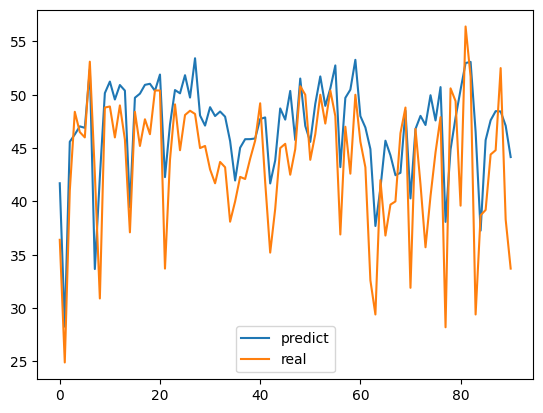

In [367]:
plt.plot(y_pred,label='predict')
plt.plot(y_test.values,label='real')
plt.legend()
plt.show()

#### 2) 모델2

In [371]:
model2 = KNeighborsRegressor()
model2.fit(x_train_s,y_train)
y_pred=model2.predict(x_test_s)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

MAE: 5.869450549450549
MAPE: 0.13704875523072374
-0.41125764015402555


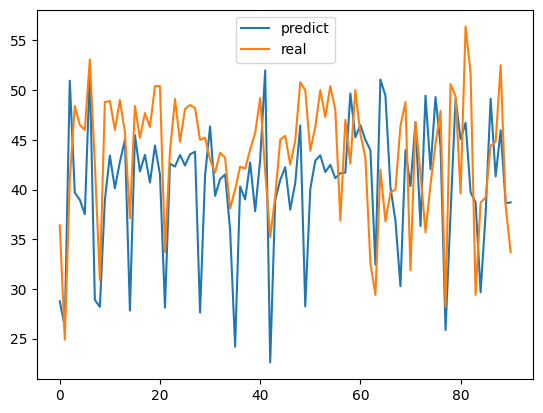

In [372]:
plt.plot(y_pred,label='predict')
plt.plot(y_test.values,label='real')
plt.legend()
plt.show()

#### 3) 모델3

In [373]:
model3 = DecisionTreeRegressor(random_state=1)
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

MAE: 5.384615384615383
MAPE: 0.12824796713097072
-0.5042454217562578


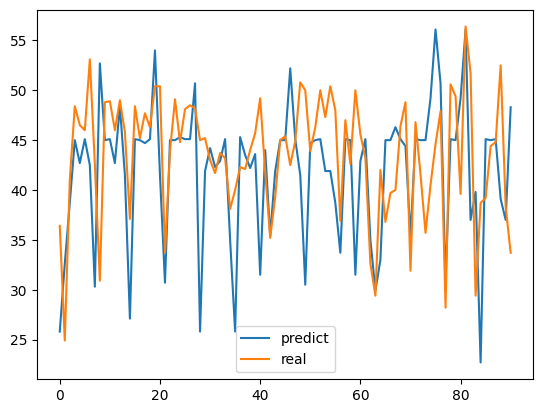

In [374]:
plt.plot(y_pred,label='predict')
plt.plot(y_test.values,label='real')
plt.legend()
plt.show()

#### 4) 모델4

In [375]:
model4 = RandomForestRegressor(random_state=1)
model4.fit(x_train,y_train)
y_pred=model4.predict(x_test)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))

MAE: 2.8946703296703293
MAPE: 0.07278813030290089


In [461]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

param = {'max_depth':range(1,21)}

model = RandomizedSearchCV(model4, # 기본 모델
                          param,     # 파라미터 범위
                          cv=5,      # K-Fold 개수
                          n_iter=10, # 랜덤하게 선택할 파라미터(조합) 갯수
                          scoring='r2') # 평가지표

In [462]:
model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
                   param_distributions={'max_depth': range(1, 21)},
                   scoring='r2')

In [464]:
# 중요 정보 확인
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 80)

[0.69459103 0.69586721 0.6300824  0.69093896 0.69445952 0.66180011
 0.48325164 0.69399255 0.69119536 0.37312475]
--------------------------------------------------------------------------------
최적파라미터: {'max_depth': 16}
--------------------------------------------------------------------------------
최고성능: 0.6958672080046447


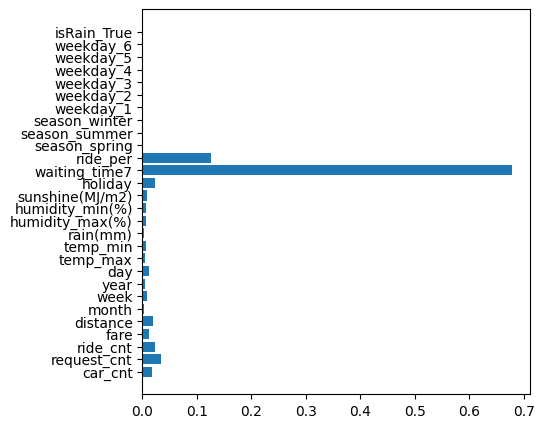

In [445]:
plt.figure(figsize=(5, 5))
plt.barh(y=list(x), width=model.best_estimator_.feature_importances_)
plt.show()

In [446]:
feature=pd.DataFrame()
feature['feature']=list(x_train)
feature['importance']=model.best_estimator_.feature_importances_
feature.sort_values(by='importance',ascending=False)

,feature,importance
16,waiting_time7,0.677701
17,ride_per,0.125764
1,request_cnt,0.034908
2,ride_cnt,0.022673
15,holiday,0.022228
4,distance,0.018701
0,car_cnt,0.017950
8,day,0.011743
3,fare,0.011581
6,week,0.007683


In [436]:
model5 = LGBMRegressor(max_depth=14, verbose=-100)
model5.fit(x_train,y_train)
y_pred=model5.predict(x_test)

print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))

3.3613838268220575
0.08208628568906952


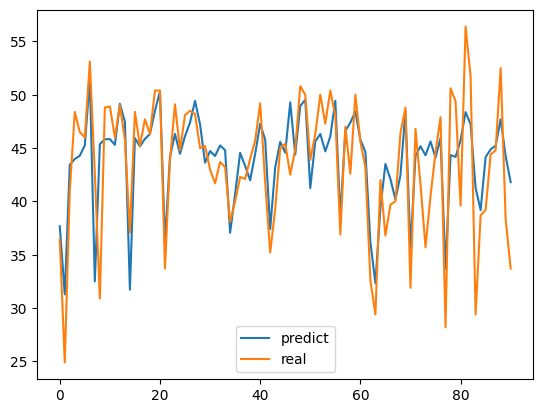

In [387]:
plt.plot(y_pred,label='predict')
plt.plot(y_test.values,label='real')
plt.legend()
plt.show()

In [386]:
df.head()

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,month,week,year,day,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),holiday,waiting_time7,ride_per,isRain,season_spring,season_summer,season_winter,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,213,1023,924,17.2,2427,10764,1,1,2015,1,-2.0,-8.9,0.0,63.0,28.0,9.07,1,17.200000,0.903,False,0,0,1,0,0,1,0,0,0
2015-01-02,420,3158,2839,17.2,2216,8611,1,1,2015,2,2.4,-9.2,0.0,73.0,37.0,8.66,0,17.200000,0.899,False,0,0,1,0,0,0,1,0,0
2015-01-03,209,1648,1514,26.2,2377,10198,1,1,2015,3,8.2,0.2,0.0,89.0,58.0,5.32,0,21.700000,0.919,False,0,0,1,0,0,0,0,1,0
2015-01-04,196,1646,1526,24.5,2431,10955,1,1,2015,4,7.9,-0.9,0.0,95.0,52.0,6.48,0,22.633333,0.927,False,0,0,1,0,0,0,0,0,1
2015-01-05,421,4250,3730,26.2,2214,8663,1,2,2015,5,4.1,-7.4,3.4,98.0,29.0,10.47,0,23.525000,0.878,True,0,0,1,0,0,0,0,0,0


In [454]:
model=RandomForestRegressor(max_depth=14)
model.fit(x_train.drop('waiting_time7',axis=1),y_train)

RandomForestRegressor(max_depth=14)

In [455]:
y_pred=model.predict(x_test.drop('waiting_time7',axis=1))

In [456]:
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

3.196609186556273
0.07843360271978993
0.5405107851785026


### (2) 딥러닝

#### 1) 모델1

In [420]:
print(x_train.shape,y_train.shape)

(2831, 28) (2831,)


In [421]:
X=tf.keras.Input(shape=[28])
Y=tf.keras.layers.Dense(1)(X)

model=tf.keras.Model(X,Y)
model.compile(loss='mse',optimizer='adam',metrics=['mae','mape'])
model.summary()

Model: "model_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_37 (InputLayer)       [(None, 28)]              0         
                                                                 
 dense_105 (Dense)           (None, 1)                 29        
                                                                 
Total params: 29 (116.00 Byte)
Trainable params: 29 (116.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [467]:
import tensorflow as tf
X = tf.keras.Input(shape=[28])

H = tf.keras.layers.Dense(64)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dense(32)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

Y=tf.keras.layers.Dense(1)(H)

model=tf.keras.Model(X,Y)
model.compile(loss='mse',optimizer='adam',metrics=['mae','mape'])
model.summary()

Model: "model_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_41 (InputLayer)       [(None, 28)]              0         
                                                                 
 dense_115 (Dense)           (None, 64)                1856      
                                                                 
 batch_normalization_74 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 activation_17 (Activation)  (None, 64)                0         
                                                                 
 dense_116 (Dense)           (None, 32)                2080      
                                                                 
 batch_normalization_75 (Ba  (None, 32)                128       
 tchNormalization)                                        

In [468]:
model.fit(x_train, y_train, epochs=500, batch_size=128)

Epoch 1/500
23/23 [==============================] - 1s 3ms/step - loss: 1818.3098 - mae: 40.3703 - mape: 101.1127
Epoch 2/500
23/23 [==============================] - 0s 3ms/step - loss: 1776.9146 - mae: 40.0624 - mape: 100.9662
Epoch 3/500
23/23 [==============================] - 0s 3ms/step - loss: 1742.6107 - mae: 39.7942 - mape: 100.7725
Epoch 4/500
23/23 [==============================] - 0s 2ms/step - loss: 1709.1134 - mae: 39.5041 - mape: 100.3479
Epoch 5/500
23/23 [==============================] - 0s 2ms/step - loss: 1672.3933 - mae: 39.2082 - mape: 99.9841
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 1636.8495 - mae: 38.8818 - mape: 99.4059
Epoch 7/500
23/23 [==============================] - 0s 3ms/step - loss: 1601.5941 - mae: 38.5215 - mape: 98.6802
Epoch 8/500
23/23 [==============================] - 0s 3ms/step - loss: 1564.9396 - mae: 38.1326 - mape: 97.9139
Epoch 9/500
23/23 [==============================] - 0s 2ms/step - loss: 1525.2588 -

In [469]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 1s 6ms/step - loss: 25.5429 - mae: 3.9522 - mape: 9.5413


[25.542898178100586, 3.9521641731262207, 9.541254043579102]

In [470]:
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2.8924285714285713
0.07329657930206662
0.5773867558522148


#### 2) 모델2

## 4.모델 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

LinearRegression
MAE: 4.286536338377334
MAPE: 0.1095591916782691

KNeighborsRegressor
MAE: 5.869450549450549
MAPE: 0.13704875523072374

DecisionTreeRegressor
MAE: 5.384615384615383
MAPE: 0.12824796713097072

RandomForestRegressor
MAE: 2.8946703296703293
MAPE: 0.07278813030290089

LGBMRegressor
MAE: 3.3613838268220575
MAPE: 0.08208628568906952

딥러닝
MAE: 2.8924285714285713
MAPE:0.07329657930206662